# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [19]:
import sympy as sp
import numpy as np

def demand(p):
    return (500-p)/3.2

def supply(p,t):
    return ((100+p)/4.3)+t

def supply2(p,t):
    return 1.23*t + 23.25

p,t=sp.symbols('p t', real=True, positive=True)



In [20]:
inv_d = sp.Eq(500-3.2*p,p)
inv_ds = sp.solve(inv_d,p)
inv_ds

[119.047619047619]

In [21]:
eq_lik=sp.Eq(demand(p),supply(p,t))
eq_lik

Eq(156.25 - 0.3125*p, 0.232558139534884*p + t + 23.2558139534884)

In [22]:
sol_eqp = sp.solve(eq_lik,p)
sol_eqp[0]

244.0 - 1.83466666666667*t

In [23]:
sol_eqq = supply(sol_eqp[0],t)
sol_eqq



0.573333333333333*t + 80.0

In [24]:
p_eq_fn=sp.lambdify(
    (t,p), 
    sol_eqp[0]
)

p_eq_fn(t,p)

p_eq_fn(0,0)

244.0

In [25]:
p_eq_fn(4,0)
p_eq = p_eq_fn(0,0)

In [26]:
x_eq_fn=sp.lambdify(
    (t,p), 
    sol_eqq
)

x_eq_fn(t,p)

x_eq_fn(0,0)

80.0

In [27]:
x_eq = x_eq_fn(0,0)
x_eq



80.0

In [28]:
x_eq_fn(4,0)

82.29333333333334

In [39]:
producer_surplus = sp.integrate(x_eq-supply(p,0),(p,0,p_eq))
producer_surplus
producer_surplus_a = sp.integrate(x_eq_fn(4,0)-supply(p,4),(p,0,p_eq))
producer_surplus_a                                

6506.36403100775

In [41]:
consumer_surplus=sp.integrate(demand(p)-x_eq,(p,0,p_eq))
consumer_surplus_a= sp.integrate(demand(p)-x_eq_fn(4,0),(p,0,p_eq_fn(4,0)))
consumer_surplus_a


8751.34167111111

In [43]:
welfare_surplus = consumer_surplus + producer_surplus
welfare_surplus_a = producer_surplus_a + consumer_surplus_a
welfare_surplus_a

15257.7057021189

In [46]:
avgift_prov =sp.integrate(4, (p, 0, x_eq_fn(4,0)))
avgift_prov

329.173333333333

In [48]:
død_v =sp.integrate(demand(p) - supply(p, 0), (p, p_eq_fn(4,0), p_eq))
død_v

14.6773333333313

Text(0.5, 1.0, 'Markedslikevekt')

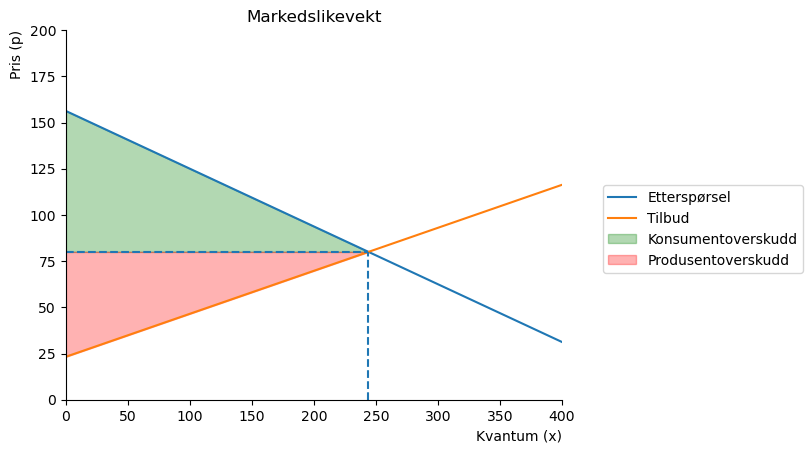

In [248]:
from matplotlib import pyplot as plt
x_num=np.linspace(0,500,100)
q =np.linspace(0,p_eq,100)

t0 = sp.solve(eq_lik,p)

#lag en akse

def create_ax():
    
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set(xlim=(0,400))
                ax.set(ylim=(0,200))
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen
ax.plot(x_num,demand(x_num), label='Etterspørsel')

ax.plot(x_num,supply(x_num,0), label='Tilbud')



ax.hlines(x_eq,0,p_eq, linestyles = "dashed", clip_on=False)
ax.vlines(p_eq,0,x_eq, linestyles = "dashed", clip_on=False)

ax.fill_between(q,x_eq,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q,0),x_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')





ax.legend(bbox_to_anchor=(1.5,0.6))

# tittel
ax.set_title('Markedslikevekt')

#vis navnene:


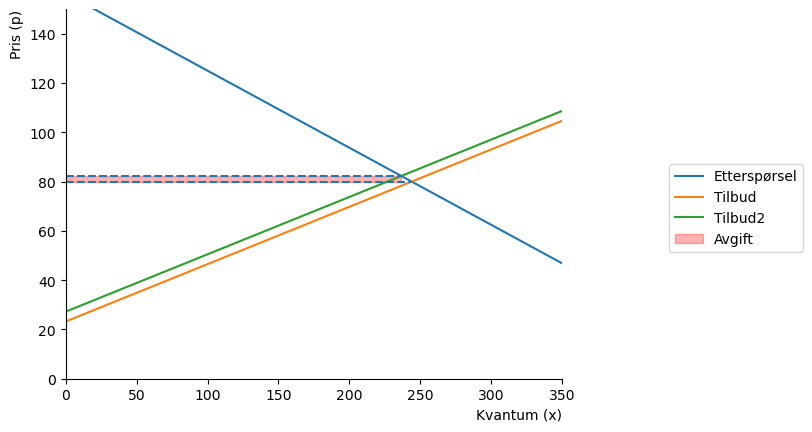

In [278]:
 x_num=np.linspace(0.1,500,100)
q =np.linspace(0,p_eq,200)
q2 = np.linspace(0,p_eq_fn(4,0),200)

#lag en akse

def create_ax():
    
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set(xlim=(0,350))
                ax.set(ylim=(0,150))
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen
ax.plot(x_num,demand(x_num), label='Etterspørsel')
ax.plot(x_num,supply(x_num,0), label='Tilbud')
ax.plot(x_num,supply(x_num,4), label="Tilbud2")



ax.hlines(x_eq,0,p_eq, linestyles = "dashed", clip_on=False)
ax.hlines(x_eq_fn(4,0),0,p_eq_fn(4,0), linestyles = "dashed", clip_on=False)


ax.fill_between(q2,x_eq_fn(4,0), x_eq,color="red" ,alpha = 0.3,label='Avgift')
ax.legend(bbox_to_anchor=(1.5,0.6))


In [ ]:
ax.vlines(x_eq_fn(4,0),0, p_eq_fn(4,0), linestyles = "dashed", clip_on=False)
ax.hlines(p_eq_fn(4,0),0, x_eq_fn(4,0), linestyles = "dashed", clip_on=False)
ax.plot(supply(x_num, 4),x_num, label='Tilbud med avgift (t=4)')
ax.fill_between(q,supply(q,0),p_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')


In [55]:
from IPython.display import Markdown

tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:   | ${x_eq }$    | ${round(x_eq_fn(4,0), 2)}$| ${round(x_eq_fn(4,0) - x_eq, 2)}$  |
| Produsentpris:  | ${x_eq }$ | ${round(x_eq_fn(4,0), 2)-4 }$  | ${round((x_eq_fn(4,0) - x_eq)-4, 2)}$ |
| Kvantum:  | ${round(p_eq, 2)}$  | ${round(p_eq_fn(4,0), 2)}$   |  ${round(p_eq_fn(4,0) - p_eq, 2)}$  |
| Konsumentoverskudd: | ${round(consumer_surplus, 2)}$ |${round(consumer_surplus_a, 2)}$ |  ${round(consumer_surplus_a - consumer_surplus, 2)}$   |
| Produsentoverskudd: | ${round(producer_surplus, 2)}$ | ${round(producer_surplus_a, 2)}$ |  ${round(producer_surplus_a - producer_surplus, 2)}$ |
| KO + PO:    |  ${round(producer_surplus + consumer_surplus, 2)}$   | ${round(producer_surplus_a + consumer_surplus_a, 2)}$| ${round((producer_surplus_a + consumer_surplus_a) - (producer_surplus + consumer_surplus), 2)}$ |
|Avgiftsproveny :| ${0}$  |${round(avgift_prov, 2)}$ | ${round(avgift_prov, 2) - 0}$|
| Dødvektstap:  |${0}$   | ${round(død_v, 2)}$ | ${round(død_v, 2) - 0}$|
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:   | $80.0$    | $82.29$| $2.29$  |
| Produsentpris:  | $80.0$ | $78.29$  | $-1.71$ |
| Kvantum:  | $244.0$  | $236.66$   |  $-7.34$  |
| Konsumentoverskudd: | $9302.50$ |$8751.34$ |  $-551.16$   |
| Produsentoverskudd: | $6922.79$ | $6506.36$ |  $-416.43$ |
| KO + PO:    |  $16225.29$   | $15257.71$| $-967.58$ |
|Avgiftsproveny :| $0$  |$329.17$ | $329.17$|
| Dødvektstap:  |$0$   | $14.68$ | $14.68$|
